In [1]:
cd ../cloudc

/orange/adamginsburg/jwst/brick/cloudc


In [2]:
ls /orange/adamginsburg/jwst/brick/cloudc/alma

member.uid___A001_X15a0_X138.Sgr_A_star_sci.spw24.mfs.I.pbcor.fits*
member.uid___A001_X87d_X133.c_sma1_sci.spw25_27_29_31_33_35_37.cont.I.pbcor.fits*
member.uid___A001_X87d_X135.c_sma1_sci.spw25_27_29_31_33_35_37.cont.I.pbcor.fits*
member.uid___A001_X88e_X1e8._G0.38p0.04__sci.spw25_27_29_31_33_35_37_39_41_43.cont.I.tt0.pbcor.fits*
member.uid___A001_X88f_X19d.IRAS_18566p0408_sci.spw31.cube.I.pbcor.fits*


In [3]:
from astropy.io import fits

In [97]:
from astropy.io import fits
import reproject
from astropy import convolution
from astropy.convolution import Gaussian2DKernel
from astropy import units as u
from astropy.table import Table
import pyavm
from pyavm import AVM

In [5]:
import regions
from astropy import coordinates

In [6]:
import PIL

In [7]:
from spectral_cube import SpectralCube, Projection, Slice

In [8]:
import uvcombine
from astropy import wcs

In [9]:
import scipy.ndimage

In [10]:
import matplotlib
from matplotlib.colors import rgb_to_hsv, hsv_to_rgb

In [11]:
import numpy as np

In [12]:
import pylab as pl
from astropy.visualization import simple_norm

In [13]:
cloudc_miri = fits.open('/orange/adamginsburg/jwst/brick/cloudc/images/jw02221-o001_t001_miri_f2550w_i2d.fits')

In [15]:
ww = wcs.WCS(cloudc_miri['SCI'].header)

In [60]:
alma_cloudc_a = SpectralCube.read('/orange/adamginsburg/jwst/brick/cloudc/alma/member.uid___A001_X87d_X133.c_sma1_sci.spw25_27_29_31_33_35_37.cont.I.pbcor.fits')
alma_cloudc_b = SpectralCube.read('/orange/adamginsburg/jwst/brick/cloudc/alma/member.uid___A001_X87d_X135.c_sma1_sci.spw25_27_29_31_33_35_37.cont.I.pbcor.fits')
g038 = SpectralCube.read('/orange/adamginsburg/jwst/brick/cloudc/alma/member.uid___A001_X88e_X1e8._G0.38p0.04__sci.spw25_27_29_31_33_35_37_39_41_43.cont.I.tt0.pbcor.fits')
aces_as = SpectralCube.read('/orange/adamginsburg/ACES/data/2021.1.00172.L/science_goal.uid___A001_X1590_X30a8/group.uid___A001_X1590_X30a9/member.uid___A001_X15a0_X1a8/calibrated/working/uid___A001_X15a0_X1a8.s10_0.Sgr_A_star_sci.spw25_27_29_31_33_35.cont.I.iter1.image.tt0', format='casa_image')
aces_as = SpectralCube.read('/orange/adamginsburg/ACES/data/2021.1.00172.L/science_goal.uid___A001_X1590_X30a8/group.uid___A001_X1590_X30a9/member.uid___A001_X15a0_X1a8/product/member.uid___A001_X15a0_X1a8.Sgr_A_star_sci.spw25_27_29_31_33_35.cont.I.tt0.pbcor.fits', format='fits')

/blue/adamginsburg/adamginsburg/repos/casa-formats-io/casa_formats_io/casa_dask.py:247: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]


INFO: Auto-setting vmin to -9.431e-04 [aplpy.core]
INFO: Auto-setting vmax to  1.564e-03 [aplpy.core]


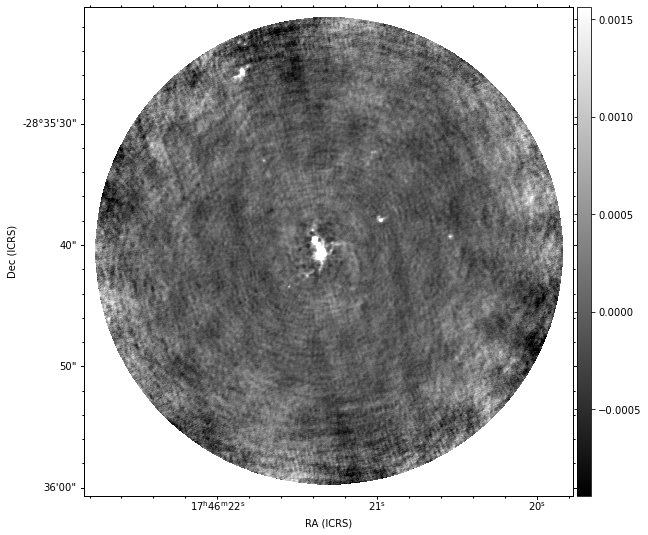

In [34]:
alma_cloudc_a[0].quicklook()

INFO: Auto-setting vmin to -1.111e-02 [aplpy.core]
INFO: Auto-setting vmax to  3.682e-02 [aplpy.core]


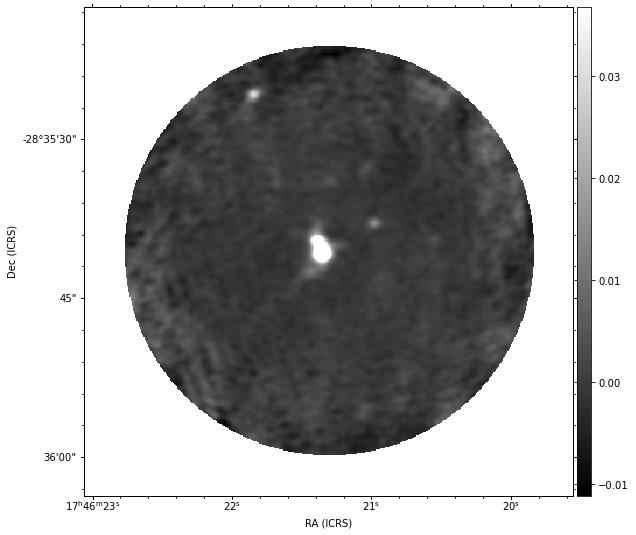

In [38]:
alma_cloudc_b[0].quicklook()

(516.4090325541408, 903.409251867234, 1335.9301921575602, 891.7563777930993)

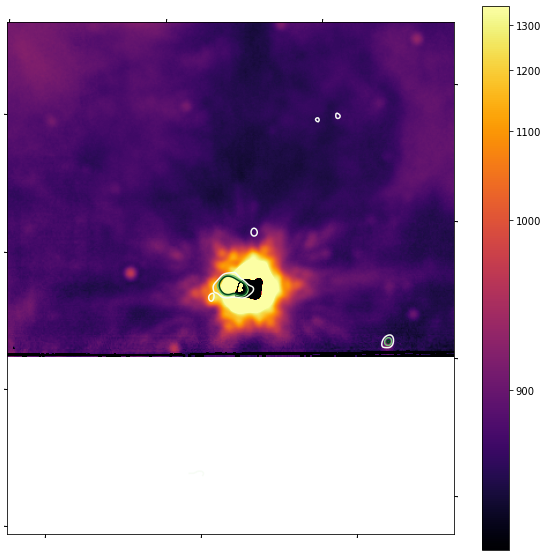

In [45]:
pl.figure(figsize=(10,10))
ax = pl.subplot(projection=ww)
data = cloudc_miri['SCI'].data
im = ax.imshow(data, norm=simple_norm(data, stretch='asinh', min_cut=850, max_cut=1350),
               cmap='inferno')
ax.contour(alma_cloudc_b[0].value, transform=ax.get_transform(alma_cloudc_b.wcs.celestial), levels=[0.01, 0.02, 0.03], cmap='Greens')
pl.colorbar(mappable=im)
blc = alma_cloudc_b.wcs.celestial.pixel_to_world(0,0)
trc = alma_cloudc_b.wcs.celestial.pixel_to_world(*alma_cloudc_b.shape[1:])
blc_xy = ww.world_to_pixel(blc)
trc_xy = ww.world_to_pixel(trc)
ax.axis((blc_xy[0], trc_xy[0], blc_xy[1], trc_xy[1]))

INFO: Auto-setting vmin to -6.890e-04 [aplpy.core]
INFO: Auto-setting vmax to  7.841e-04 [aplpy.core]


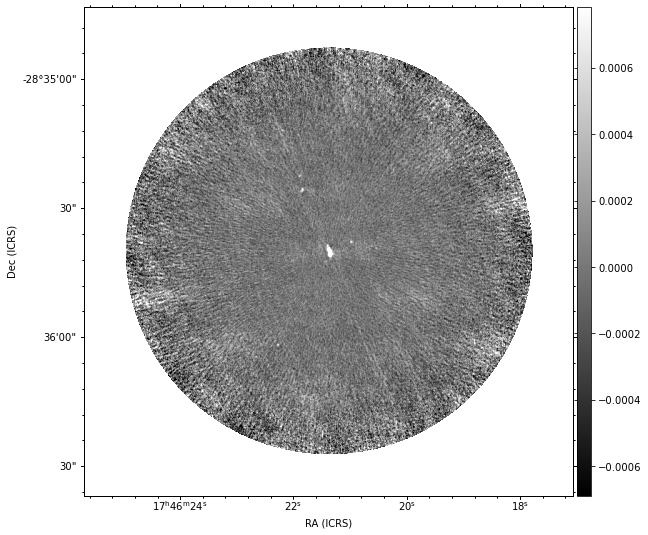

In [48]:
g038[0].quicklook()

(418.6019467721854, 1011.4847399208804, 1462.7592405603427, 782.2903555360612)

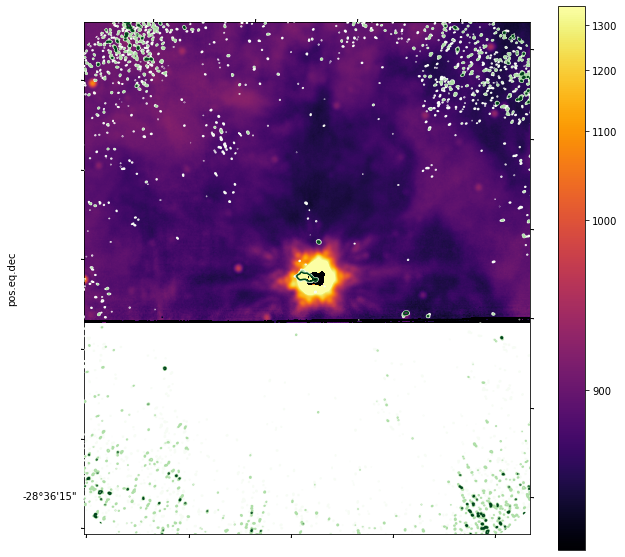

In [54]:
pl.figure(figsize=(10,10))
ax = pl.subplot(projection=ww)
data = cloudc_miri['SCI'].data
im = ax.imshow(data, norm=simple_norm(data, stretch='asinh', min_cut=850, max_cut=1350),
               cmap='inferno')
ax.contour(g038[0].value, transform=ax.get_transform(g038.wcs.celestial), levels=[0.0003, 0.0004, 0.0006], cmap='Greens')
pl.colorbar(mappable=im)
blc = g038.wcs.celestial.pixel_to_world(500, 500)
trc = g038.wcs.celestial.pixel_to_world(*[x-500 for x in g038.shape[1:]])
blc_xy = ww.world_to_pixel(blc)
trc_xy = ww.world_to_pixel(trc)
ax.axis((blc_xy[0], trc_xy[0], blc_xy[1], trc_xy[1]))

INFO: Auto-setting vmin to -1.896e-03 [aplpy.core]
INFO: Auto-setting vmax to  2.193e-03 [aplpy.core]


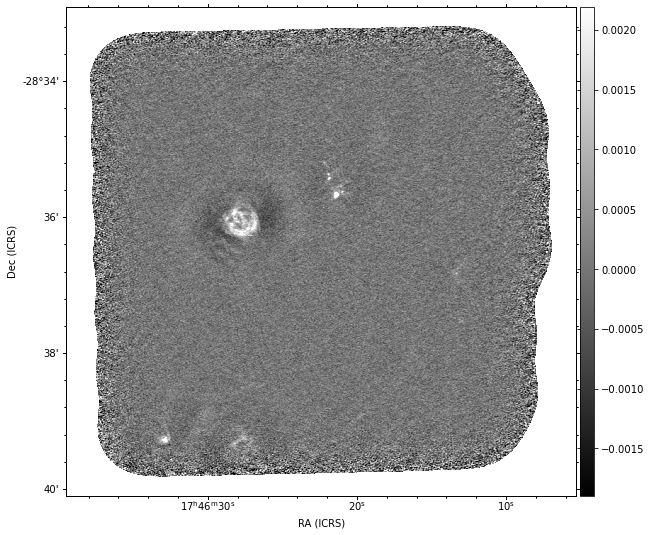

In [61]:
aces_as[0].quicklook()

(-0.5, 1501.5, -0.5, 1182.5)

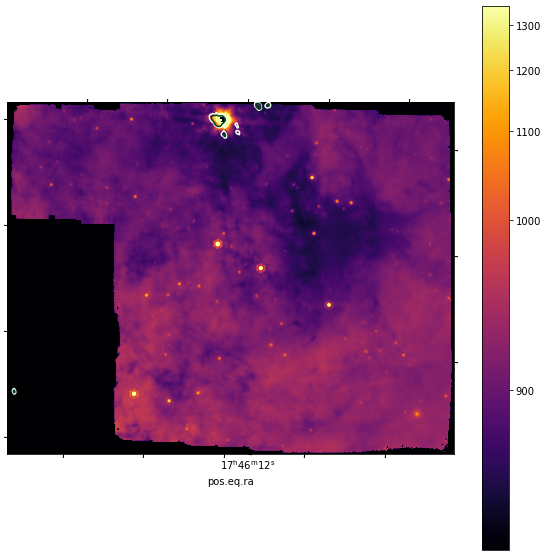

In [64]:
pl.figure(figsize=(10,10))
ax = pl.subplot(projection=ww)
data = cloudc_miri['SCI'].data
im = ax.imshow(data, norm=simple_norm(data, stretch='asinh', min_cut=850, max_cut=1350),
               cmap='inferno')
pl.colorbar(mappable=im)
axis = ax.axis()
ax.contour(aces_as[0].value, transform=ax.get_transform(aces_as.wcs.celestial), levels=[0.001, 0.002], cmap='Greens')
blc = aces_as.wcs.celestial.pixel_to_world(0, 0)
trc = aces_as.wcs.celestial.pixel_to_world(*[x-0 for x in aces_as.shape[1:]])
blc_xy = ww.world_to_pixel(blc)
trc_xy = ww.world_to_pixel(trc)
#ax.axis((blc_xy[0], trc_xy[0], blc_xy[1], trc_xy[1]))
ax.axis(axis)

(1840.1002017364185, 964.1643801782252, 977.1229448983312, 1574.4611295027917)

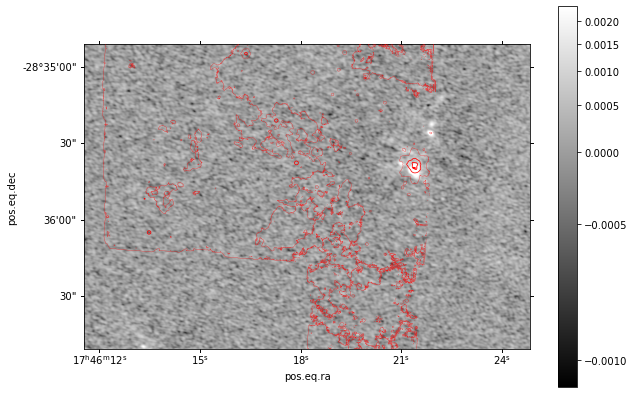

In [73]:
pl.figure(figsize=(10,7))
ax = pl.subplot(projection=aces_as.wcs.celestial)
data = cloudc_miri['SCI'].data
im = ax.imshow(aces_as[0].data, norm=simple_norm(aces_as[0].data, stretch='asinh', min_percent=1, max_percent=99.95),
               cmap='gray')
pl.colorbar(mappable=im)
#axis = ax.axis()
ax.contour(data, transform=ax.get_transform(ww), levels=[900, 1300], colors=['r','r'], linewidths=[0.25,0.75])
blc = ww.pixel_to_world(0, 0)
trc = ww.pixel_to_world(*[x-0 for x in data.shape])
blc_xy = aces_as.wcs.celestial.world_to_pixel(blc)
trc_xy = aces_as.wcs.celestial.world_to_pixel(trc)
ax.axis((blc_xy[0], trc_xy[0], blc_xy[1], trc_xy[1]))

In [80]:
tgt_header = cloudc_miri['SCI'].header

In [81]:
poly = regions.PolygonSkyRegion(coordinates.SkyCoord(ww.calc_footprint()[:,0], ww.calc_footprint()[:,1], unit=(u.deg, u.deg), frame=ww.wcs.radesys.lower()))

In [82]:
i1 = fits.open('/orange/adamginsburg/spitzer/GLIMPSE/GLM_00000+0000_mosaic_I1.fits')
i2 = fits.open('/orange/adamginsburg/spitzer/GLIMPSE/GLM_00000+0000_mosaic_I2.fits')
i3 = fits.open('/orange/adamginsburg/spitzer/GLIMPSE/GLM_00000+0000_mosaic_I3.fits')
i4 = fits.open('/orange/adamginsburg/spitzer/GLIMPSE/GLM_00000+0000_mosaic_I4.fits')

In [83]:
wwspitz = wcs.WCS(i1[0].header)

In [84]:
polymask = poly.to_pixel(wwspitz).to_mask()

In [85]:
tgt_header['CRPIX1'], tgt_header['NAXIS1']

(752.6457411415187, 1502)

In [86]:
tgt_header_spitzer = tgt_header.copy()
tgt_header_spitzer['NAXIS1'] = tgt_header_spitzer['NAXIS1'] // 2
tgt_header_spitzer['NAXIS2'] = tgt_header_spitzer['NAXIS2'] // 2
tgt_header_spitzer['CRPIX1'] /= 2
tgt_header_spitzer['CRPIX2'] /= 2
tgt_header_spitzer['CDELT1'] *= 2
tgt_header_spitzer['CDELT2'] *= 2

In [87]:
i1r,_ = reproject.reproject_interp(i1, tgt_header_spitzer)
i2r,_ = reproject.reproject_interp(i2, tgt_header_spitzer)
i3r,_ = reproject.reproject_interp(i3, tgt_header_spitzer)
i4r,_ = reproject.reproject_interp(i4, tgt_header_spitzer)

In [94]:
def save_rgb(img, filename):
    img = (img*256)
    img[img<0] = 0
    img[img>255] = 255
    img = img.astype('uint8')
    img = PIL.Image.fromarray(img[::-1,:,:])
    img.save(filename)

In [95]:
rgb_spitzer = np.array([
    (i4r),
    (i2r),
    (i1r),
]).swapaxes(0,2).swapaxes(0,1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


TypeError: embed() missing 1 required positional argument: 'filename_out'

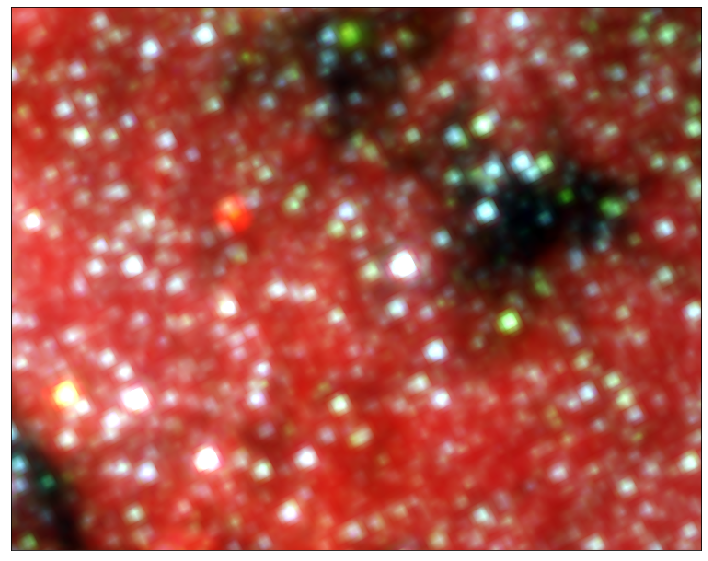

In [98]:
pl.figure(figsize=(24,10))
rgb_spitzer_scaled = np.array([simple_norm(rgb_spitzer[:,:,0], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb_spitzer[:,:,0]),
                               simple_norm(rgb_spitzer[:,:,1], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb_spitzer[:,:,1]),
                               simple_norm(rgb_spitzer[:,:,2], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb_spitzer[:,:,2])]).swapaxes(0,2).swapaxes(0,1)

pl.imshow(rgb_spitzer_scaled, origin='lower', interpolation='none')
pl.xticks([]);
pl.yticks([]);
pl.savefig("Spitzer_RGB_I421.png", dpi=300)
outpng = "CloudCSpitzer_RGB_I421.png"
save_rgb(rgb_spitzer_scaled, outpng)
AVM.embed(outpng, outpng)